# 오픈 API를 이용한 웹페이지 크롤링

### 오픈 API란?

- 크롤링은 하면 웹사이트에 과부하가 생기므로 이를 방지하는 차원에서 크롤링을 막는 경우가 있음
- 오픈 API를 사용하여 원하는 정보를 얻을 수 있게 도와 줌

- API : Application Programming Interface
    - 사전적정의 : 운영체제나 프로그래밍 언어가 제공하는 기능을 응용프로그램에서 사용 또는 제어할 수 있도록 만든 인터페이스

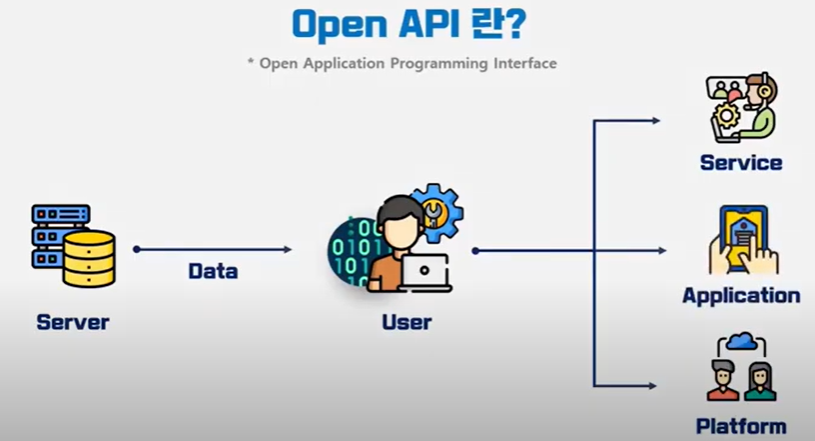

*출처: 공공데이터활용지원센터, https://www.youtube.com/watch?v=pe5-RQb-OPI

### 공공데이터 포털 사이트(http://data.go.kr)

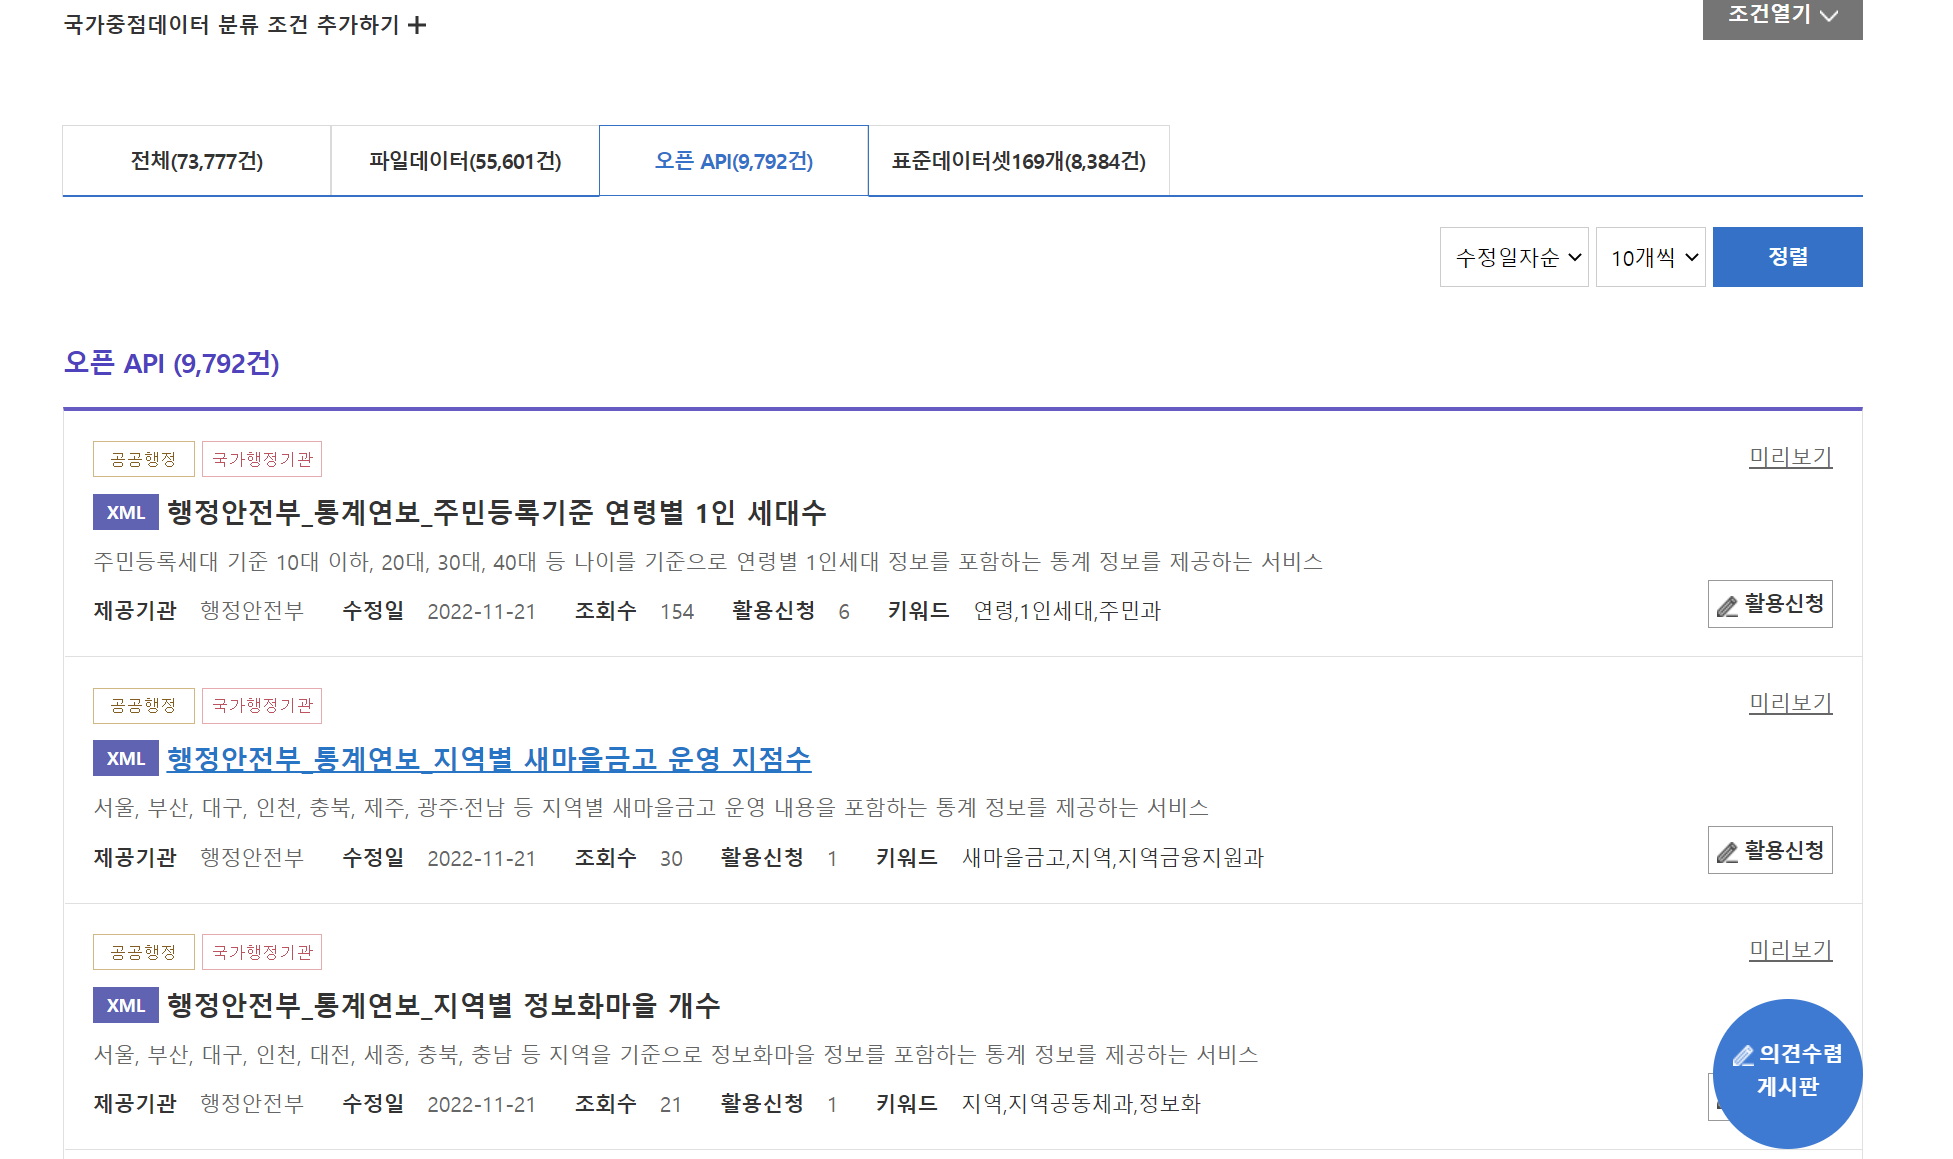

### 공공데이터 포털의 오픈API 사용과정

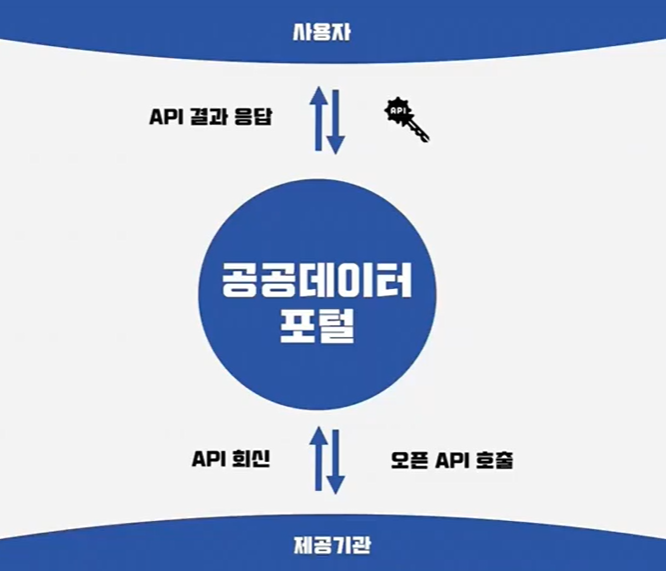

## 실습. 부동산 데이터 웹크롤링

https://www.data.go.kr/data/15099361/openapi.do

### 1.  공공데이터 포털사이트에서 API 등록하기

1. 회원가입 : 오픈 API 사용을 위해 회원가입
    
2. 로그인

3. data.go.kr 검색란에서 '부동산 거래 통계 조회 서비스' 입력

4. 검색 결과 중 [오픈API]에서 **'한국부동산원_부동산 거래 통계 조회 서비스'** 선택한 후 **<활용신청>**버튼을 클릭

5. 활용신청 페이지에서 **활용목적을 입력**하고 **'동의합니다'체크** 후 **<활용신청>버튼** 클릭

6. [마이페이지]로 이동하여 **[오픈API]-[인증키 발급현황]** 메뉴 클릭
    - API를 사용하기 위해 필요한 인증키임

7. [마이페이지]로 이동하여 승인된 목록에서 **[부동산 거래현황 통계조회서비스]** 를 클릭

- 서비스 정보 확인

8. **[기본정보]** 의 **<상세설명>** 버튼을 클릭하여 '부동산 거래현황 통계조회서비스' 상세페이지로 이동

9. 오픈API상세 페이지에서 **관련기술문서 링크**를 웹페이지에 입력하여 해당 문서를 다운로드함

### 2. API 사용하기

#### 실습예제1.  '연도별 부동산 거래건수 조회' 데이터 크롤링

#### 1) [부동산 거래현황 통계조회서비스] 기술문서를 참고하여 api 요청/응답 테스트

- '24 연도별 부동산 거래 건수 조회'를 찾아서 요청메세지 예제 코드를 복사하여 웹브라우저 주소창에 넣고 서비스 키를 뒤에 붙여 클릭하여 응답 메시지 결과대로 나오는지 확인

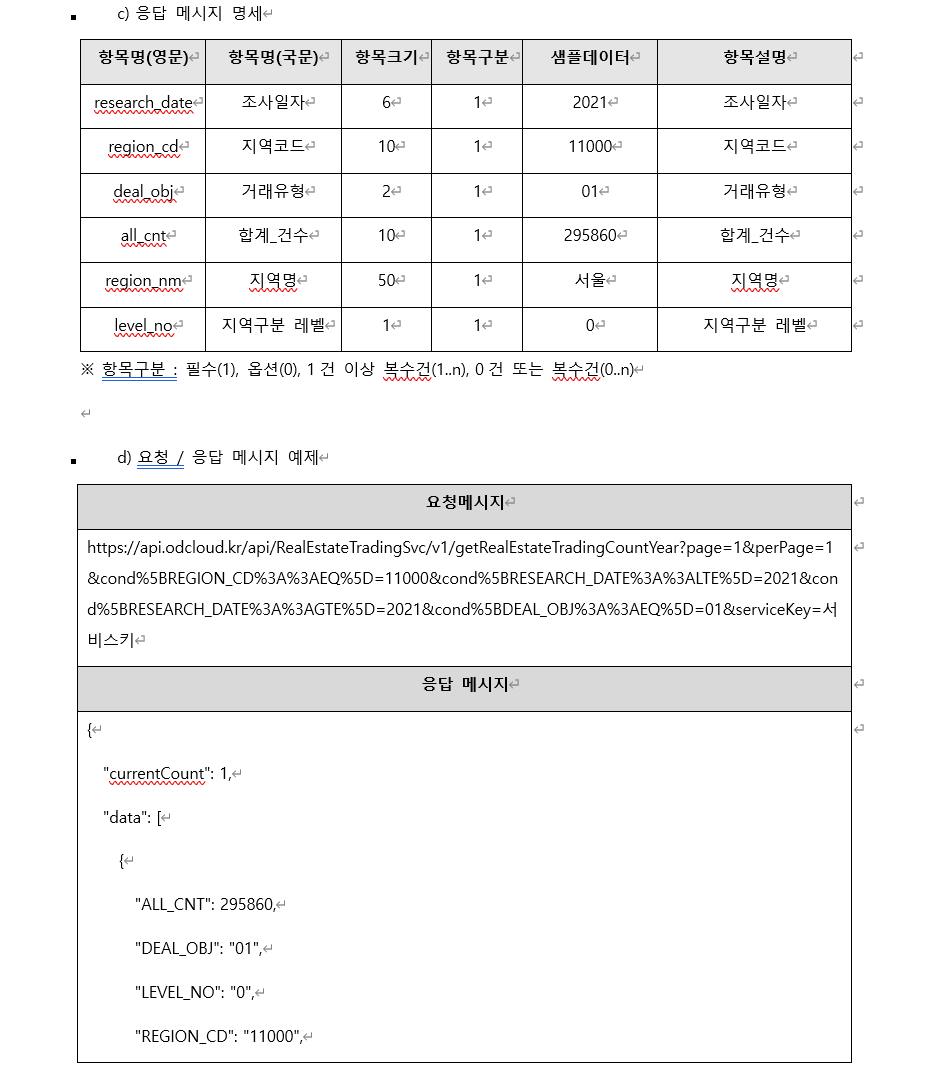

#### 2. **[부동산 거래현황 통계조회서비스]** 페이지에서 아래로 스크롤하여 **'활용신청 상세기능정보'** 항목
- 모든 부동산 정보가 나열되어 있음
- '연도별 부동산 거래 건수 조회'를 클릭하여 입력 매개변수와 값을 확인

In [1]:
# 요청페이지 url + 요청인자(파라미터)
endpoint = 'https://api.odcloud.kr/api/RealEstateTradingSvc/v1/getRealEstateTradingCount?'
key = 'VG3woLPBtNC%2FeIGRQtfibx75GvIUoa1DezC6vqEq2qqX82YSfIS8nbNf14KEz2F23QBeRP3IW8fjL%2BsNeW4Z6A%3D%3D'

In [2]:
page = '1'
perpage = '1'
region_cd = '11000' # 전국
start = '2021'
end = '2021'
deal_obj = '01' # 토지 / 아파트:05

In [3]:
params = 'page='+ page +'&'\
'perPage='+ perpage +'&'\
'cond[REGION_CD::EQ]='+ region_cd +'&'\
'cond[RESEARCH_DATE::LTE]='+ end +'&'\
'cond[RESEARCH_DATE::GTE]='+ start +'&'\
'cond[DEAL_OBJ:EQ]='+ deal_obj +'&'\
'serviceKey='+key

In [4]:
url = endpoint + params
url

'https://api.odcloud.kr/api/RealEstateTradingSvc/v1/getRealEstateTradingCount?page=1&perPage=1&cond[REGION_CD::EQ]=11000&cond[RESEARCH_DATE::LTE]=2021&cond[RESEARCH_DATE::GTE]=2021&cond[DEAL_OBJ:EQ]=01&serviceKey=VG3woLPBtNC%2FeIGRQtfibx75GvIUoa1DezC6vqEq2qqX82YSfIS8nbNf14KEz2F23QBeRP3IW8fjL%2BsNeW4Z6A%3D%3D'

### [실습코드] BeautifulSoup을 이용한 크롤링

In [5]:
import requests
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd

#### 크롤링할 API 요청하기

- 2019년~2021년 종로구 아파트거래현황 데이터

In [6]:
endpoint = 'https://api.odcloud.kr/api/RealEstateTradingSvc/v1/getRealEstateTradingCount'
key = 'VG3woLPBtNC%2FeIGRQtfibx75GvIUoa1DezC6vqEq2qqX82YSfIS8nbNf14KEz2F23QBeRP3IW8fjL%2BsNeW4Z6A%3D%3D'

In [7]:
returnType = 'JSON'
page = '1'
perpage = '5'
region_cd = '11110' # 종로구
start = '2019'
end = '2021'
deal_obj = '05' # 아파트:05

In [8]:
params = '?'+'page='+ page +'&'\
'perPage='+ perpage +'&'\
'cond[REGION_CD::EQ]='+ region_cd +'&'\
'cond[RESEARCH_DATE::LTE]='+ end +'&'\
'cond[RESEARCH_DATE::GTE]='+ start +'&'\
'cond[DEAL_OBJ::EQ]='+ deal_obj +'&'\
'serviceKey='+key

<!--강사님 코드-->
page = '1' 
perPage = '1'
region_cd = '11000' # 전국
start = '2020'
end = '2021'
deal_obj = '05'  # 토지  아파트:05

params = 'page='+ page +'&'\
'perPage='+perPage+'&'\
'cond[REGION_CD::EQ]='+ region_cd +'&'\
'cond[RESEARCH_DATE::LTE]='+ end +'&'\
'cond[RESEARCH_DATE::GTE]='+ start +'&'\
'cond[DEAL_OBJ::EQ]='+ deal_obj+'&'\
'serviceKey='+key

In [9]:
url = endpoint + params

In [10]:
response = urlopen(url)

In [11]:
response.read()
#json 형식

b'{"currentCount":5,"data":[{"ALL_CNT":51,"DEAL_OBJ":"05","LEVEL_NO":"1","REGION_CD":"11110","REGION_NM":"\xec\xa2\x85\xeb\xa1\x9c\xea\xb5\xac","RESEARCH_DATE":"201901"},{"ALL_CNT":56,"DEAL_OBJ":"05","LEVEL_NO":"1","REGION_CD":"11110","REGION_NM":"\xec\xa2\x85\xeb\xa1\x9c\xea\xb5\xac","RESEARCH_DATE":"201902"},{"ALL_CNT":78,"DEAL_OBJ":"05","LEVEL_NO":"1","REGION_CD":"11110","REGION_NM":"\xec\xa2\x85\xeb\xa1\x9c\xea\xb5\xac","RESEARCH_DATE":"201903"},{"ALL_CNT":64,"DEAL_OBJ":"05","LEVEL_NO":"1","REGION_CD":"11110","REGION_NM":"\xec\xa2\x85\xeb\xa1\x9c\xea\xb5\xac","RESEARCH_DATE":"201904"},{"ALL_CNT":43,"DEAL_OBJ":"05","LEVEL_NO":"1","REGION_CD":"11110","REGION_NM":"\xec\xa2\x85\xeb\xa1\x9c\xea\xb5\xac","RESEARCH_DATE":"201905"}],"matchCount":24,"page":1,"perPage":5,"totalCount":411531}\n'

### 실습예제2. 부동산 거래건수 데이터 크롤링

##### XML 형식으로 가져오기

- 2019년1월~2022년6월까지 종로구 아파트거래 현황 데이터 수집

In [12]:
returnType='XML'
page = '1'
perpage = '42'
region_cd = '11110' # 종로구
start = '201901'
end = '202206'
deal_obj = '05' # 아파트:05

In [13]:
url = endpoint + params + '&returnType=' + returnType

- urllib.urlopen 요청

In [14]:
res = urlopen(url)
soup = BeautifulSoup(res, 'xml')

In [15]:
soup

<?xml version="1.0" encoding="utf-8"?>
<results><currentCount>5</currentCount><data><item><col name="RESEARCH_DATE">201901</col><col name="ALL_CNT">51</col><col name="DEAL_OBJ">05</col><col name="LEVEL_NO">1</col><col name="REGION_CD">11110</col><col name="REGION_NM">종로구</col></item><item><col name="ALL_CNT">56</col><col name="DEAL_OBJ">05</col><col name="LEVEL_NO">1</col><col name="REGION_CD">11110</col><col name="REGION_NM">종로구</col><col name="RESEARCH_DATE">201902</col></item><item><col name="REGION_CD">11110</col><col name="REGION_NM">종로구</col><col name="RESEARCH_DATE">201903</col><col name="ALL_CNT">78</col><col name="DEAL_OBJ">05</col><col name="LEVEL_NO">1</col></item><item><col name="REGION_NM">종로구</col><col name="RESEARCH_DATE">201904</col><col name="ALL_CNT">64</col><col name="DEAL_OBJ">05</col><col name="LEVEL_NO">1</col><col name="REGION_CD">11110</col></item><item><col name="ALL_CNT">43</col><col name="DEAL_OBJ">05</col><col name="LEVEL_NO">1</col><col name="REGION_CD">111

- requests.get()사용

In [16]:
# 딕셔너리 형태로 할 때는 endpoint에 ? 없이!
params_dic = {'returnType':returnType,
              'page':page,
              'perPage':perpage,
              'cond[REGION_CD::EQ]':region_cd,
              'cond[RESEARCH_DATE::LTE]':end,
              'cond[RESEARCH_DATE::GTE]':start,
              'cond[DEAL_OBJ:EQ]':deal_obj,
              'serviceKey':key}

url = endpoint + params

In [17]:
res = requests.get(endpoint, params=params_dic)
res

<Response [400]>

#### 부동산거래 현황을 데이터프레임으로 저장

In [18]:
items = soup.find_all('item')
items

[<item><col name="RESEARCH_DATE">201901</col><col name="ALL_CNT">51</col><col name="DEAL_OBJ">05</col><col name="LEVEL_NO">1</col><col name="REGION_CD">11110</col><col name="REGION_NM">종로구</col></item>,
 <item><col name="ALL_CNT">56</col><col name="DEAL_OBJ">05</col><col name="LEVEL_NO">1</col><col name="REGION_CD">11110</col><col name="REGION_NM">종로구</col><col name="RESEARCH_DATE">201902</col></item>,
 <item><col name="REGION_CD">11110</col><col name="REGION_NM">종로구</col><col name="RESEARCH_DATE">201903</col><col name="ALL_CNT">78</col><col name="DEAL_OBJ">05</col><col name="LEVEL_NO">1</col></item>,
 <item><col name="REGION_NM">종로구</col><col name="RESEARCH_DATE">201904</col><col name="ALL_CNT">64</col><col name="DEAL_OBJ">05</col><col name="LEVEL_NO">1</col><col name="REGION_CD">11110</col></item>,
 <item><col name="ALL_CNT">43</col><col name="DEAL_OBJ">05</col><col name="LEVEL_NO">1</col><col name="REGION_CD">11110</col><col name="REGION_NM">종로구</col><col name="RESEARCH_DATE">201905

- item 태그 하나에 들어있는 정보를 딕셔너리로 저장하는 함수 작성

In [19]:
columns = ["REGION_NM","RESEARCH_DATE","ALL_CNT","DEAL_OBJ","LEVEL_NO","REGION_CD"]
estate = {}

In [20]:
def to_real_estate(item_tag):
    columns = ["REGION_NM","RESEARCH_DATE","ALL_CNT",
               "DEAL_OBJ","LEVEL_NO","REGION_CD"]
    estate = {}
    for col in columns:
        estate[col] = item.find('col',{'name':col}).text
    return estate

In [21]:
estate_list = []
for item in items :
    estate = to_real_estate(item)
    estate_list.append(estate)
estate_list

[{'REGION_NM': '종로구',
  'RESEARCH_DATE': '201901',
  'ALL_CNT': '51',
  'DEAL_OBJ': '05',
  'LEVEL_NO': '1',
  'REGION_CD': '11110'},
 {'REGION_NM': '종로구',
  'RESEARCH_DATE': '201902',
  'ALL_CNT': '56',
  'DEAL_OBJ': '05',
  'LEVEL_NO': '1',
  'REGION_CD': '11110'},
 {'REGION_NM': '종로구',
  'RESEARCH_DATE': '201903',
  'ALL_CNT': '78',
  'DEAL_OBJ': '05',
  'LEVEL_NO': '1',
  'REGION_CD': '11110'},
 {'REGION_NM': '종로구',
  'RESEARCH_DATE': '201904',
  'ALL_CNT': '64',
  'DEAL_OBJ': '05',
  'LEVEL_NO': '1',
  'REGION_CD': '11110'},
 {'REGION_NM': '종로구',
  'RESEARCH_DATE': '201905',
  'ALL_CNT': '43',
  'DEAL_OBJ': '05',
  'LEVEL_NO': '1',
  'REGION_CD': '11110'}]

- 조회한 부동산거래 전체 데이터를 읽고 데이터프레임으로 저장

In [22]:
df = pd.DataFrame(estate_list,
                 columns=columns)

In [23]:
df

,REGION_NM,RESEARCH_DATE,ALL_CNT,DEAL_OBJ,LEVEL_NO,REGION_CD
0,종로구,201901,51,05,1,11110
1,종로구,201902,56,05,1,11110
2,종로구,201903,78,05,1,11110
3,종로구,201904,64,05,1,11110
4,종로구,201905,43,05,1,11110


----------------

### 과제. 공중화장실개방현황 데이터를 API로 수집

- 경기데이터드림 사이트 : https://data.gg.go.kr/portal/mainPage.do
- 데이터 다운로드 링크 주소 https://data.gg.go.kr/portal/data/service/selectServicePage.do?infId=GW6U772M6045H11Q799612585601&infSeq=1

1. 수집한 데이터를 데이터프레임으로 저장
2. 데이터 전처리를 진행하여 화장실의 위치를 지도로 시각화
    - 중복데이터, 결측치, 주소 변경 등(실습평가문제 참고)
3. 작성한 파일을 구글드라이브에 업로드
    - 구글드라이브 링크: https://drive.google.com/drive/folders/15CQWv99PU2LMJQCn4UqcfDvPJK49UDQS?usp=sharing

--------------------------------------------------